**A Web-Scraped Overview of Global Market Cap Distribution by Country**

In [ ]:
import requests

URL = 'https://companiesmarketcap.com/page/1/'
user_agent ='Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'

response = requests.get(URL, headers={'user-agent': user_agent})

if response.ok:
    message = 'The request was successfully received, understood, and accepted.'
else:
    message = 'The request was not successful.'

print('Status Code:', response.status_code)
print(message)

Status Code: 200
The request was successfully received, understood, and accepted.


In [ ]:
type(response)

requests.models.Response

In [ ]:
from bs4 import BeautifulSoup

html = response.content
parser = 'lxml'

soup = BeautifulSoup(html, parser)
type(soup)

bs4.BeautifulSoup

In [ ]:
print(soup.prettify()[:1500])

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Companies ranked by Market Cap - CompaniesMarketCap.com
  </title>
  <meta charset="utf-8"/>
  <link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
  <link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
  <link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
  <link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
  <link href="/img/icons/apple-icon-180x180.pn

In [ ]:
table = soup.find('tbody')

In [ ]:
first_row = table.find('tr')
print(first_row.prettify())

<tr>
 <td class="fav">
  <img alt="favorite icon" data-id="1" src="/img/fav.svg?v2"/>
 </td>
 <td class="rank-td td-right" data-sort="1">
  1
 </td>
 <td class="name-td">
  <div class="logo-container">
   <img alt="Microsoft logo" class="company-logo" loading="lazy" src="/img/company-logos/64/MSFT.png"/>
  </div>
  <div class="name-div">
   <a href="/microsoft/marketcap/">
    <div class="company-name">
     Microsoft
    </div>
    <div class="company-code">
     <span class="rank d-none">
     </span>
     MSFT
    </div>
   </a>
  </div>
 </td>
 <td class="td-right" data-sort="3569403035648">
  <span class="currency-symbol-left">
   $
  </span>
  3.569 T
 </td>
 <td class="td-right" data-sort="48024">
  $480.24
 </td>
 <td class="rh-sm" data-sort="46">
  <span class="percentage-green">
   <svg class="a" viewbox="0 0 12 12">
    <path d="M10 8H2l4-4 4 4z">
    </path>
   </svg>
   0.46%
  </span>
 </td>
 <td class="p-0 sparkline-td green">
  <svg>
   <path d="M0,41 L5,40 L10,31 L15,3

In [ ]:
first_row.find('div', {'class': 'company-name'})

<div class="company-name">Microsoft</div>

In [ ]:
company = first_row.find('div', {'class': 'company-name'}).text
company

'Microsoft'

In [ ]:
ticker = first_row.find('div', {'class': 'company-code'}).text
ticker

'MSFT'

In [ ]:
market_cap = first_row.find_all('td', {'class': 'td-right'})[1].text
market_cap

'$3.569 T'

In [ ]:
price = first_row.find_all('td', {'class': 'td-right'})[2].text
price

'$480.24'

In [ ]:
today = first_row.find_all('span')[2].text
today

'0.46%'

In [ ]:
country = first_row.find_all('span', {'class': 'responsive-hidden'})[0].text
country

'USA'

In [ ]:
import pandas as pd

first_row = pd.DataFrame(
    {
        'Company': company,
        'Ticker': ticker,
        'Market Cap.': market_cap,
        'Price': price,
        'Daily Change': today,
        'Country': country
    },
    index=[0])

first_row

,Company,Ticker,Market Cap.,Price,Daily Change,Country
0,Microsoft,MSFT,$3.569 T,0.46%,0.46%,USA


In [ ]:
table = table.find_all('tr')

In [ ]:
len(table)

102

In [ ]:
companies, tickers, market_caps, prices, changes, countries = [], [], [], [], [], []

for row in table:
    # Company name
    name = row.find('div', {'class': 'company-name'})
    companies.append(name.text.strip() if name else '')

    # Ticker
    code = row.find('div', {'class': 'company-code'})
    tickers.append(code.text.strip() if code else '')

    # Market Cap and Price (td-right has both values)
    td_rights = row.find_all('td', {'class': 'td-right'})
    market_caps.append(td_rights[1].text.strip() if len(td_rights) > 1 else '')
    prices.append(td_rights[2].text.strip() if len(td_rights) > 2 else '')

    # Daily Change
    spans = row.find_all('span')
    # Try to find a span that contains %
    change = next((s.text.strip() for s in spans if '%' in s.text), '')
    changes.append(change)

    # Country
    country = row.find('span', {'class': 'responsive-hidden'})
    countries.append(country.text.strip() if country else '')


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Company': companies,
    'Ticker': tickers,
    'Market Cap': market_caps,
    'Price': prices,
    'Change': changes,
    'Country': countries
})

print(df.head())


             Company Ticker Market Cap    Price Change Country
0          Microsoft   MSFT   $3.569 T  $480.24  0.46%     USA
1             NVIDIA   NVDA   $3.547 T  $145.48  0.94%     USA
2              Apple   AAPL   $2.936 T  $196.58  0.48%     USA
3             Amazon   AMZN   $2.256 T  $212.52  1.07%     USA
4  Alphabet (Google)   GOOG   $2.106 T  $173.98  1.83%     USA


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import time
import random

# Tracking time
today = datetime.datetime.now()
start = time.time()

# Initialize the DataFrame
columns = ['Company', 'Ticker', 'Market Cap', 'Price', 'Daily Change', 'Country']
df = pd.DataFrame(columns=columns)

num_of_pages = 62

for p in range(1, num_of_pages + 1):

    # URL for each page
    URL = f'https://companiesmarketcap.com/page/{p}/'

    # Retry loop until request is successful
    while True:
        response = requests.get(URL, headers={"User-Agent": "Mozilla/5.0"})
        if response.ok:
            break
        print(f'Page {p:02d} - Request failed, retrying...')
        time.sleep(random.uniform(5, 10))

    print(f'Page {p:02d} - Request successful.')

    # Parse HTML
    soup = BeautifulSoup(response.content, 'lxml')
    rows = soup.find('tbody').find_all('tr')

    # Temporary storage
    companies, tickers, market_caps, prices, changes, countries = [], [], [], [], [], []

    for row in rows:
        try:
            name = row.find('div', {'class': 'company-name'}).text.strip()
        except:
            name = ''

        try:
            ticker = row.find('div', {'class': 'company-code'}).text.strip()
        except:
            ticker = ''

        try:
            tds = row.find_all('td', {'class': 'td-right'})
            market_cap = tds[1].text.strip() if len(tds) > 1 else ''
            price = tds[2].text.strip() if len(tds) > 2 else ''
        except:
            market_cap, price = '', ''

        try:
            # Get percentage change containing "%"
            span_tags = row.find_all('span')
            change = next((s.text.strip() for s in span_tags if '%' in s.text), '')
        except:
            change = ''

        try:
            country = row.find('span', {'class': 'responsive-hidden'}).text.strip()
        except:
            country = ''

        companies.append(name)
        tickers.append(ticker)
        market_caps.append(market_cap)
        prices.append(price)
        changes.append(change)
        countries.append(country)

    # Build page DataFrame
    df_page = pd.DataFrame({
        'Company': companies,
        'Ticker': tickers,
        'Market Cap': market_caps,
        'Price': prices,
        'Daily Change': changes,
        'Country': countries
    })

    # Append to main DataFrame
    df = pd.concat([df, df_page], ignore_index=True)

    # Random delay
    time.sleep(random.uniform(5, 15))

end = time.time()

print(f"\n✅ Completed scraping {num_of_pages} pages in {(end - start):.2f} seconds.")


Page 01 - Request successful.
Page 02 - Request successful.
Page 03 - Request successful.
Page 04 - Request successful.
Page 05 - Request successful.
Page 06 - Request successful.
Page 07 - Request successful.
Page 08 - Request successful.
Page 09 - Request successful.
Page 10 - Request successful.
Page 11 - Request successful.
Page 12 - Request successful.
Page 13 - Request successful.
Page 14 - Request successful.
Page 15 - Request successful.
Page 16 - Request successful.
Page 17 - Request successful.
Page 18 - Request successful.
Page 19 - Request successful.
Page 20 - Request successful.
Page 21 - Request successful.
Page 22 - Request successful.
Page 23 - Request successful.
Page 24 - Request successful.
Page 25 - Request successful.
Page 26 - Request successful.
Page 27 - Request successful.
Page 28 - Request successful.
Page 29 - Request successful.
Page 30 - Request successful.
Page 31 - Request successful.
Page 32 - Request successful.
Page 33 - Request successful.
Page 34 - 

In [ ]:
df.iloc[[0, 1, -2, -1]]

,Company,Ticker,Market Cap,Price,Daily Change,Country
0,Microsoft,MSFT,$3.569 T,$480.24,0.46%,USA
1,NVIDIA,NVDA,$3.547 T,$145.48,0.94%,USA
6322,Clairvest Group,CVG.TO,$0.74 B,$52.07,0.45%,Canada
6323,Kaveri Seed,KSCL.NS,$0.74 B,$14.61,0.29%,India


In [ ]:
df.isna().sum()

,0
Company,0
Ticker,0
Market Cap,0
Price,0
Daily Change,0
Country,0


In [ ]:
df['Company'] = df['Company'].str.strip('\r\n')

df.to_csv('Companies.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('Companies.csv')
df.head()

,Company,Ticker,Market Cap,Price,Daily Change,Country
0,Microsoft,MSFT,$3.569 T,$480.24,0.46%,USA
1,NVIDIA,NVDA,$3.547 T,$145.48,0.94%,USA
2,Apple,AAPL,$2.936 T,$196.58,0.48%,USA
3,Amazon,AMZN,$2.256 T,$212.52,1.07%,USA
4,Alphabet (Google),GOOG,$2.106 T,$173.98,1.83%,USA


In [ ]:
df['Country'].replace({'S. Arabia': 'Saudi Arabia'}, inplace=True)

/tmp/ipython-input-47-3436221922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].replace({'S. Arabia': 'Saudi Arabia'}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       6200 non-null   object
 1   Ticker        6200 non-null   object
 2   Market Cap    6200 non-null   object
 3   Price         6199 non-null   object
 4   Daily Change  6200 non-null   object
 5   Country       6200 non-null   object
dtypes: object(6)
memory usage: 296.6+ KB


In [ ]:
df[df['Price'].isnull()]

,Company,Ticker,Market Cap,Price,Daily Change,Country
17,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6094,NaN,NaN,NaN,NaN,NaN,NaN
6137,NaN,NaN,NaN,NaN,NaN,NaN
6196,NaN,NaN,NaN,NaN,NaN,NaN
6239,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(subset=['Price'])

In [ ]:
df['Price'] = df['Price'].fillna('N/A')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6199 entries, 0 to 6323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       6199 non-null   object
 1   Ticker        6199 non-null   object
 2   Market Cap    6199 non-null   object
 3   Price         6199 non-null   object
 4   Daily Change  6199 non-null   object
 5   Country       6199 non-null   object
dtypes: object(6)
memory usage: 339.0+ KB


In [ ]:
df['Market Cap'] = df['Market Cap'].str.strip('$')

In [ ]:
df['Price'] = df['Price'].str.strip('$')
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [ ]:
df['Daily Change'] = df['Daily Change'].str.strip('%').astype(float)
df.rename(columns={'Daily Change': 'Daily Change (%)'}, inplace=True)

In [ ]:
df.head()

,Company,Ticker,Market Cap,Price,Daily Change (%),Country
0,Microsoft,MSFT,3.569000e+12,480.24,0.46,USA
1,NVIDIA,NVDA,3.547000e+12,145.48,0.94,USA
2,Apple,AAPL,2.936000e+12,196.58,0.48,USA
3,Amazon,AMZN,2.256000e+12,212.52,1.07,USA
4,Alphabet (Google),GOOG,2.106000e+12,173.98,1.83,USA


In [ ]:
df.to_csv('Companies.csv', index=False)

In [ ]:
no_countries = df['Country'].nunique()
print('There are {} countries in the dataset.'.format(no_countries))

There are 72 countries in the dataset.


In [ ]:
import pandas as pd
import plotly.express as px

# Assume your dataframe is named df and has a column 'Country'
# If necessary, clean the 'Country' names for compatibility
df['Country'] = df['Country'].str.strip()

# Group by country to count how many companies are from each
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Company Count']

# Create the choropleth map
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Company Count',
    hover_name='Country',
    color_continuous_scale='reds',
    title='Countries With At Least One Company In The Dataset',
)

# Customize layout (like the image you showed)
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth',
        bgcolor='#1a2b3c'
    ),
    paper_bgcolor='#1a2b3c',
    font_color='white',
    title_x=0.5,
    title_font=dict(size=22, color='royalblue')
)

fig.show()

/tmp/ipython-input-64-1049997729.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




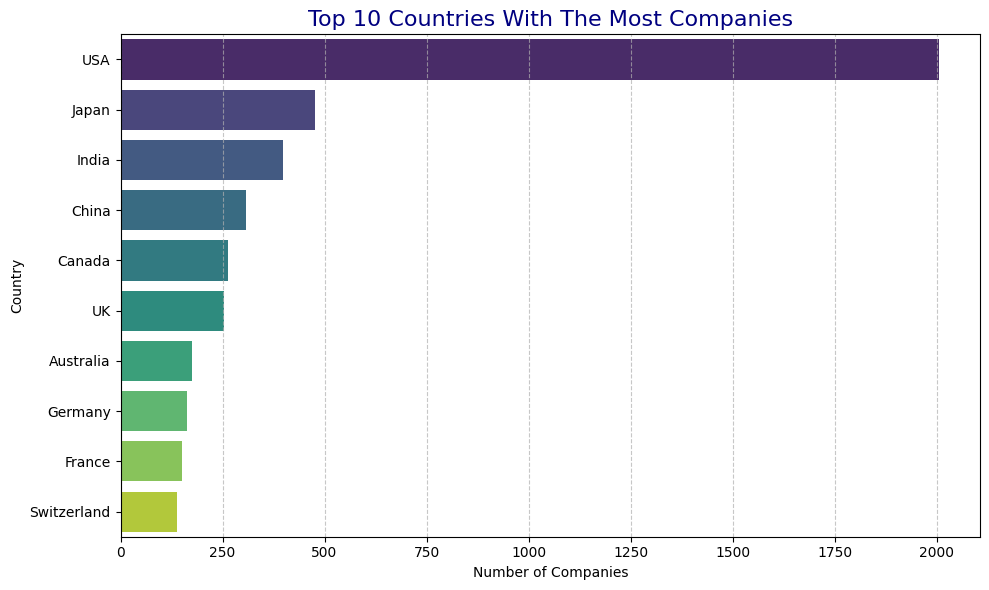

In [ ]:
#Top 10 countries with the most company
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count companies by country
top_countries = df['Country'].value_counts().nlargest(10)

# Step 2: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# Step 3: Customize the plot
plt.title('Top 10 Countries With The Most Companies', fontsize=16, color='navy')
plt.xlabel('Number of Companies')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
#Top 10 countries by market capitalization
def convert_market_cap(value):
    try:
        value = str(value).replace('$', '').replace(',', '').strip()
        if 'T' in value:
            return float(value.replace('T', '')) * 1e12
        elif 'B' in value:
            return float(value.replace('B', '')) * 1e9
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
        else:
            return float(value)
    except:
        return 0


In [ ]:
df['Market Cap (Numeric)'] = df['Market Cap'].apply(convert_market_cap)


In [ ]:
country_marketcap = df.groupby('Country')['Market Cap (Numeric)'].sum().sort_values(ascending=False).head(10)
print(country_marketcap)


Country
USA             6.083066e+13
China           8.629490e+12
Japan           5.443200e+12
India           4.266720e+12
UK              3.860880e+12
Canada          3.232080e+12
France          3.043690e+12
Germany         2.765350e+12
Switzerland     2.544470e+12
Saudi Arabia    2.344130e+12
Name: Market Cap (Numeric), dtype: float64


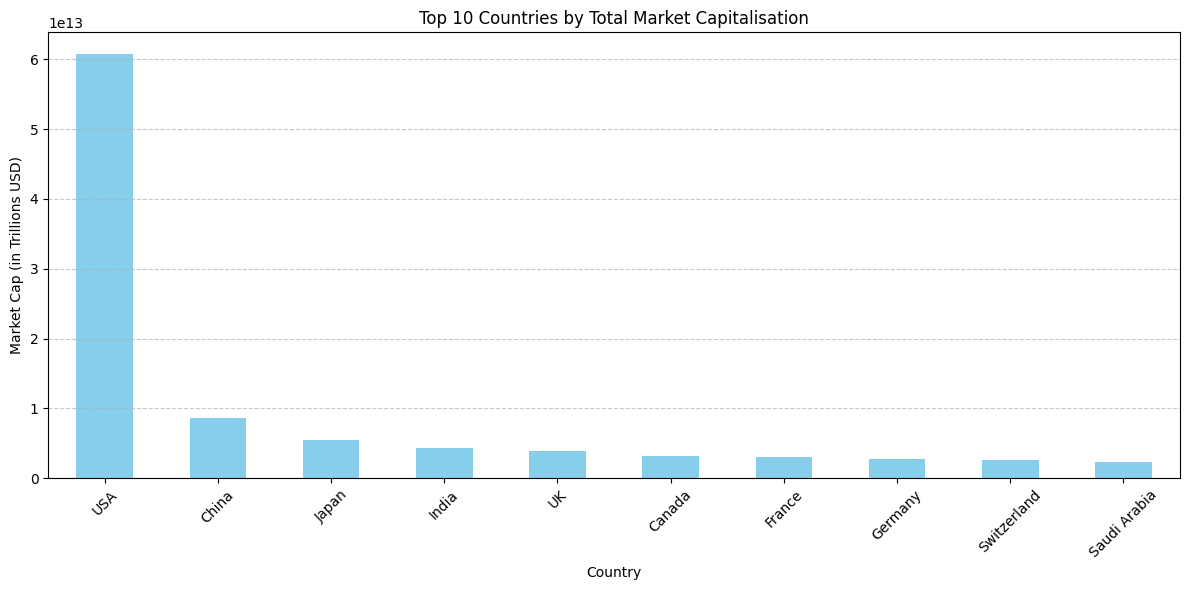

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
country_marketcap.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Market Capitalisation')
plt.ylabel('Market Cap (in Trillions USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


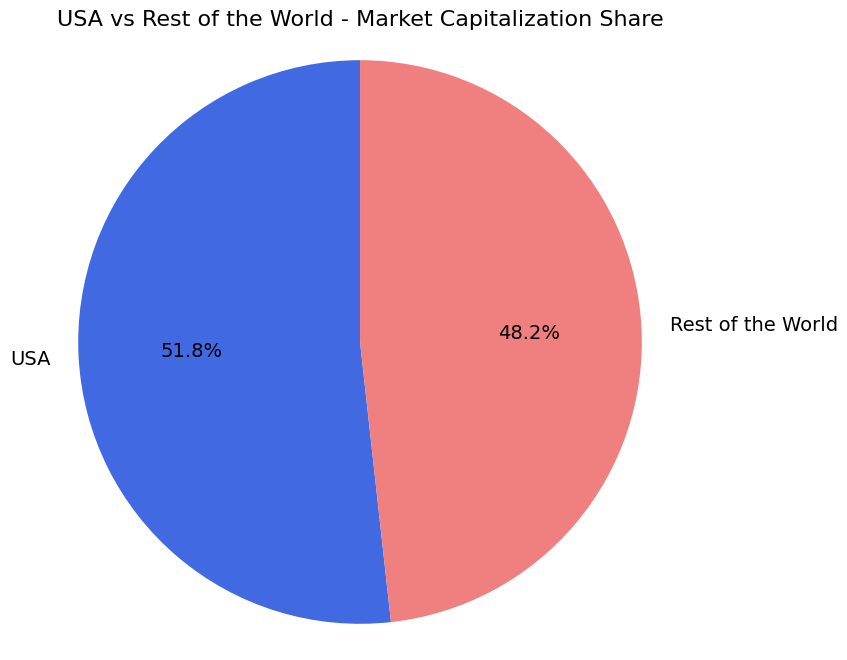

In [81]:
#USA vs Rest of the world
import matplotlib.pyplot as plt

# Convert 'Market Cap' to numeric values
def convert_market_cap(value):
    try:
        value = str(value).replace('$', '').replace(',', '').strip()
        if 'T' in value:
            return float(value.replace('T', '')) * 1e12
        elif 'B' in value:
            return float(value.replace('B', '')) * 1e9
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
        else:
            return float(value)
    except:
        return 0

# Apply conversion
df['Market Cap (Numeric)'] = df['Market Cap'].apply(convert_market_cap)

# Aggregate USA vs Rest
usa_cap = df[df['Country'] == 'USA']['Market Cap (Numeric)'].sum()
rest_cap = df[df['Country'] != 'USA']['Market Cap (Numeric)'].sum()

# Plot pie chart
labels = ['USA', 'Rest of the World']
sizes = [usa_cap, rest_cap]
colors = ['royalblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('USA vs Rest of the World - Market Capitalization Share', fontsize=16)
plt.axis('equal')
plt.show()
